In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns

# importing the dataset
df = pd.read_csv(r'titanic-passengers.csv', low_memory=False, sep = ';')
#url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
#df = pd.read_csv(url)
# showing the head of the dataset
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S


In [81]:
# general information about the data columns and values
print('Dataset Info:')
df.info()

print('Dataset Null values distribution:')
df.isnull().sum()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB
Dataset Null values distribution:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
# Preprocessing the data
# Replacing null age with mean
df['Age'].fillna((df['Age'].median()), inplace=True)

# Dropping Cabin coulmn since most of it is blank
df.drop(['Cabin'], axis = 1, inplace=True)

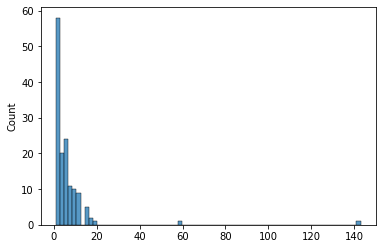

In [83]:
sns.histplot(df.groupby(['Survived', 'Age']).size())
sns.histplot.title = "Age vs Survival"



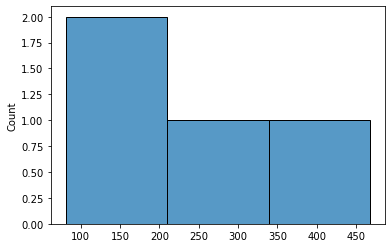

In [84]:
sns.histplot(df.groupby(['Survived', 'Sex']).size())
sns.histplot.title = "Gender vs Survival"

In [62]:
def age_group(age):
    if age >= 16:
        return 'Adult'
    else:
        return 'Child'
    
def Capitalize(attr):
    return str(attr).capitalize()

def survived(attr):
    if attr == 'Yes':
        return 1
    else:
        return 0


df['Age Group'] = df['Age'].apply(age_group).apply(Capitalize)
df['Sex / Age Group'] = df['Sex'].apply(Capitalize) + ' ' + df['Age Group']
df['Survived Flag'] = df['Survived'].apply(survived)
df.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age Group,Sex / Age Group,Survived Flag
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,Adult,Male Adult,0
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Adult,Male Adult,0
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,Adult,Male Adult,0
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,Adult,Female Adult,0
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,Adult,Male Adult,0
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,S,Adult,Male Adult,0
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,S,Adult,Male Adult,0
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,C,Child,Female Child,1
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,S,Adult,Male Adult,0
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,S,Adult,Female Adult,1


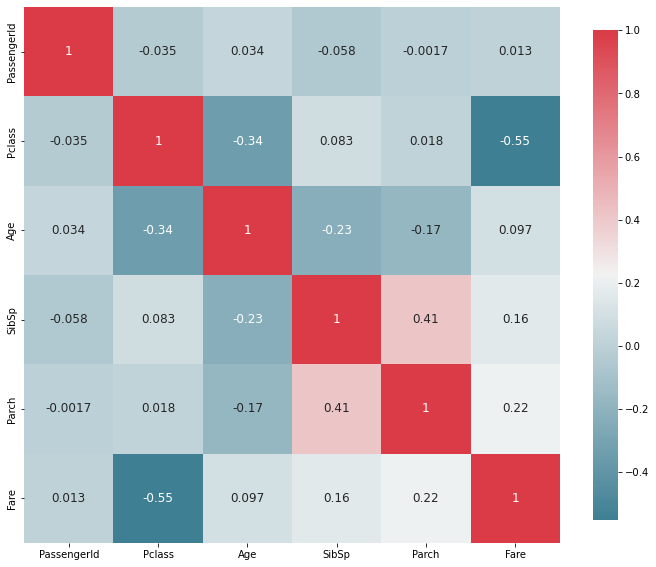

In [85]:
def plot_correlation_map( df ):
    ''' This funcion akes in the whole dataframe as a parameter and uses the heatmap plot from Seaborn library to visualize the correlacion between all the columns in the dataframe '''
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(df)

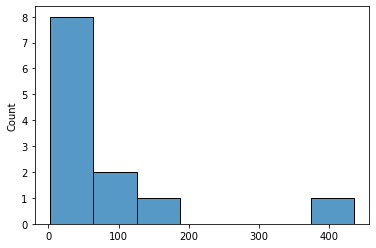

In [109]:
def get_title(name):
    x = name.split(",")
    name = x[1].split(".")
    return name[0].strip()
  
df['Title'] = df['Name'].apply(get_title)

Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                      "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                   "Lady" :      "Royalty",
                  "the Countess": "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Master" :    "Master"
                    }

df.replace({"Title": Title_Dictionary}, inplace = True)


sns.histplot(df.groupby(['Survived', 'Title']).size())
sns.histplot.title = "Title vs Survival"

df["Family Size"] = df['SibSp'] + df['Parch']